### Week 10: Day 2 – Neural Networks (Tensor Flow)

### What is TensorFlow?
TensorFlow is an end-to-end open-source machine learning platform with a focus on deep neural networks. Deep learning is a subtype of machine learning that analyses massive amounts of unstructured data. Since it works with structured data, deep learning is different from normal machine learning.

#### What are Tensors?
Tensor is a generalization of vectors and matrices of potentially higher dimensions. Arrays of data with varying dimensions and ranks that are fed as input to the neural network are called tensors.

In [1]:
# Importing necessary packages for displaying images
from PIL import Image
import numpy as np
from IPython.display import display

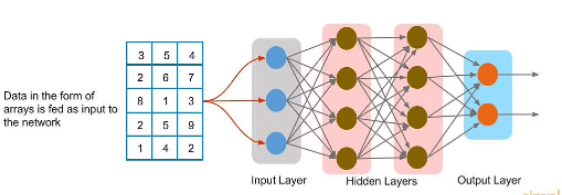

In [2]:
im=Image.open('tf1.PNG')
display(im)
array=np.array

In [3]:
# importing tensorflow package
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


### Programming Elements in TensorFlow
Unlike other programming languages, TensorFlow allows you to assign data to three different data elements:

 - Constants 
 - Variables
 - Placeholders 

##### Constants 
Constants are parameters with values that do not change. We use the tf.constant() command to define a constant.

In [4]:
# Example:

a = tf.constant(2.0, tf.float32)
b = tf.constant(3.0)
print(a, b)
# cannot change the values of constants during computation. Specifying the data, the constant is optional. 

Tensor("Const:0", shape=(), dtype=float32) Tensor("Const_1:0", shape=(), dtype=float32)


#### Variables  
Variables allow us to add new trainable parameters to the graph. To define a variable, we use the tf.Variable() command and initialize them before running the graph in a session.

In [5]:
# Example:
# Model parameters

W = tf.Variable([.3],dtype=tf.float32)

b = tf.Variable([-.3],dtype=tf.float32)

# Model input and output
x = tf.placeholder(tf.float32)

linear_model = W*x+b

#### Placeholders 
Placeholders allow us to feed data to a TensorFlow model from outside a model. It permits value to be assigned later. To define a placeholder, we use the tf.placeholder() command.

In [6]:
# Example:

a = tf.placeholder(tf.float32)
b = a*2

with tf.Session() as sess:
    result = sess.run(b,feed_dict={a:3.0})

print(result)

6.0


#### Session
Once you create a graph, you need to execute it by calling a session or using a method called run. A session is run to evaluate the nodes, which is called the TensorFlow runtime.

You can create a session by giving the command as shown:

In [7]:
sess = tf.Session()

# Consider an example shown below:
a = tf.constant(5.0)
b = tf.constant(3.0)
c = a*b

# Launch Session
sess = tf.Session()

# Evaluate the Tensor c
print(sess.run(c))

15.0


#### Matrix multiplication using tensorflow

In [8]:
# Creates a constant tensor.
a = tf.constant([ [1,2],
                [3,4] ])

In [9]:
# tf.Tensor.get_shape() is equivalent to tf.Tensor.shape.
# Returns a tf.Tensor.Shape that represents the shape of this tensor.
a.get_shape()

TensorShape([Dimension(2), Dimension(2)])

In [10]:
b = tf.constant([ [10],
                 [100] ])

In [11]:
b.get_shape()

TensorShape([Dimension(2), Dimension(1)])

In [12]:
# Multiplies matrix `a` by matrix `b`, producing `a` * `b`.
result = tf.matmul(a,b)

In [13]:
# we often use sess.run() to call operations or calculate the value of a tensor.
print(sess.run(result))

[[210]
 [430]]


#### Tensorflow Graphs

In [14]:
# Build a graph.
n1 = tf.constant(1)
n2 = tf.constant(2)

In [15]:
# It adds the values present in n1, n2 and stores it in a variable 'n3'
n3 = n1 + n2

In [16]:
# # Launch the graph in a session.
with tf.compat.v1.Session() as sess:
    # Evaluate the tensor `n3`.
    result=sess.run(n3)
    print(result)

3


When you start TensorFlow, a default Graph is created,you can create additional graphs easily:

In [17]:
# get_default_graph() can be used to obtain the default graph.
print(tf.get_default_graph())

In [18]:
# A tf.Graph can be constructed and used directly
#g = tf.graph()
# Graphs are used by tf.functions() to represent the function's computations.
g = tf.function()

In [19]:
print(g)

<function function.<locals>.decorated at 0x0000014C3D0261F0>


## Demo to expanciate variables, contants and placeholders

In [20]:
#this is a variable
zero = tf.Variable(0)

In [21]:
# this is a constant
one=tf.constant(1)

In [22]:
new_value=tf.add(zero,one)

In [23]:
#variable value can be changed
update=tf.assign(zero,new_value)

In [24]:
#update_constant=tf.assign(one, new_value)
#cannot work cause only variables can be changed

In [25]:
# Add an operation to initialize the variables.
init_op=tf.global_variables_initializer()

In [26]:
# tf.Session() initiates a TensorFlow Graph object in which tensors are processed through operations (or ops). 
sess=tf.Session()

In [27]:
## Run the init operation.
sess.run(init_op)

In [28]:
# run the operations
print(sess.run(zero))
# print(zero)
# zero = zero + 1
#  for _ in range(5)

0


In [29]:
# zero = zero + 1
#  for _ in range(5)
for _ in range(5):
    sess.run(update)   
    print(sess.run(zero))                                                  

1
2
3
4
5


## string operation

In [30]:
# Creates a constant tensor.
hello=tf.constant('Hello')

In [31]:
type(hello)

tensorflow.python.framework.ops.Tensor

In [32]:
# Creates a constant tensor.
world=tf.constant('World')

In [33]:
# The tf.add() function,takes in two numbers, two tensors, or one of each, and returns their sum as a tensor.
helloworld=tf.add(hello,world)

In [34]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
# sess.run() will evaluate the given expression and return the result of the computation.
sess = tf.compat.v1.Session()
print(sess.run(helloworld))
sess.close()

b'HelloWorld'


In [35]:
# sess.run() will evaluate the given expression and return the result of the computation.
# print(sess.run(helloworld))

In [36]:
#tf.placeholder is used to feed actual training examples.
a=tf.placeholder(tf.float32)

In [37]:
b=a*2

In [38]:
# #feeding a placeholder with scaler
# sess.run() will evaluate the given expression and return the result of the computation.
sess = tf.compat.v1.Session()
print(sess.run(b,feed_dict={a:3}))
# A session may own resources, such as variables, queues, and readers. It is important to release these resources when 
# they are no longer required. To do this, either invoke the close() method on the session
sess.close()

6.0


In [39]:
#feeding a placeholder with vector of rank 1
# sess.run() will evaluate the given expression and return the result of the computation.
sess = tf.compat.v1.Session()
print(sess.run(b,feed_dict={a:[3,4,5]}))
# A session may own resources, such as variables, queues, and readers. It is important to release these resources when 
# they are no longer required. To do this, either invoke the close() method on the session
sess.close()

[ 6.  8. 10.]


In [40]:
#feeding a placeholder with multidimentional vector
dictionary={a:[[[1,2,3],[4,5,6],[7,8,9],
               [10,11,12],[13,14,15],[16,17,18],[19,20,21],[22,23,24]]]}

# result=sess.run(b,feed_dict=dictionary)
# print(result)

In [41]:
import tensorflow as tf
tf.compat.v1.disable_eager_execution()

# sess.run() will evaluate the given expression and return the result of the computation.
sess = tf.compat.v1.Session()
print(sess.run(b,feed_dict=dictionary))
# A session may own resources, such as variables, queues, and readers. It is important to release these resources when 
# they are no longer required. To do this, either invoke the close() method on the session
sess.close()

[[[ 2.  4.  6.]
  [ 8. 10. 12.]
  [14. 16. 18.]
  [20. 22. 24.]
  [26. 28. 30.]
  [32. 34. 36.]
  [38. 40. 42.]
  [44. 46. 48.]]]


In [42]:
# A session may own resources, such as variables, queues, and readers. It is important to release these resources when 
# they are no longer required. To do this, either invoke the close() method on the session
sess.close()

In [43]:
#common syntaxt for creating session
# sess.run() will evaluate the given expression and return the result of the computation.
with tf.compat.v1.Session() as sess:
    result=sess.run(hello+world)
    print(result)

b'HelloWorld'


## basic code with graph

### demo to explain tensorflow programming structure

In [44]:
# importing neccasary libraries
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

In [45]:
# tf.get_default_graph() can be used to obtain the default graph.
graph=tf.get_default_graph()

In [46]:
# graph.get_operations() gives you a list of operations
graph.get_operations

<bound method Graph.get_operations of <tensorflow.python.framework.ops.Graph object at 0x0000014C3CF92EE0>>

In [47]:
# Creates a constant tensor.
# create graph
a=tf.constant(10,name='a')

In [48]:
# graph.get_operations() gives you a list of operations
operations=graph.get_operations()
operations

[<tf.Operation 'Const' type=Const>,
 <tf.Operation 'Const_1' type=Const>,
 <tf.Operation 'Variable/initial_value' type=Const>,
 <tf.Operation 'Variable' type=VariableV2>,
 <tf.Operation 'Variable/Assign' type=Assign>,
 <tf.Operation 'Variable/read' type=Identity>,
 <tf.Operation 'Variable_1/initial_value' type=Const>,
 <tf.Operation 'Variable_1' type=VariableV2>,
 <tf.Operation 'Variable_1/Assign' type=Assign>,
 <tf.Operation 'Variable_1/read' type=Identity>,
 <tf.Operation 'Placeholder' type=Placeholder>,
 <tf.Operation 'mul' type=Mul>,
 <tf.Operation 'add' type=AddV2>,
 <tf.Operation 'Placeholder_1' type=Placeholder>,
 <tf.Operation 'mul_1/y' type=Const>,
 <tf.Operation 'mul_1' type=Mul>,
 <tf.Operation 'Const_2' type=Const>,
 <tf.Operation 'Const_3' type=Const>,
 <tf.Operation 'mul_2' type=Mul>,
 <tf.Operation 'Const_4' type=Const>,
 <tf.Operation 'Const_5' type=Const>,
 <tf.Operation 'MatMul' type=MatMul>,
 <tf.Operation 'Const_6' type=Const>,
 <tf.Operation 'Const_7' type=Const>,


In [49]:
# Printing the node_def for the constant operation above shows what’s in TensorFlow’s protocol buffer representation 
# for the number one.
operations[0].node_def

name: "Const"
op: "Const"
attr {
  key: "dtype"
  value {
    type: DT_FLOAT
  }
}
attr {
  key: "value"
  value {
    tensor {
      dtype: DT_FLOAT
      tensor_shape {
      }
      float_val: 2.0
    }
  }
}

In [50]:
# As the name speaks for itself, Constants are used as constants. They create a node that takes value and it does not change. 
# You can simply create a constant tensor using tf.constant.
# Creates a constant tensor.
# create graph
b=tf.constant(20,name='b')

In [51]:
# graph.get_operations() gives you a list of operations
operations=graph.get_operations()
operations

[<tf.Operation 'Const' type=Const>,
 <tf.Operation 'Const_1' type=Const>,
 <tf.Operation 'Variable/initial_value' type=Const>,
 <tf.Operation 'Variable' type=VariableV2>,
 <tf.Operation 'Variable/Assign' type=Assign>,
 <tf.Operation 'Variable/read' type=Identity>,
 <tf.Operation 'Variable_1/initial_value' type=Const>,
 <tf.Operation 'Variable_1' type=VariableV2>,
 <tf.Operation 'Variable_1/Assign' type=Assign>,
 <tf.Operation 'Variable_1/read' type=Identity>,
 <tf.Operation 'Placeholder' type=Placeholder>,
 <tf.Operation 'mul' type=Mul>,
 <tf.Operation 'add' type=AddV2>,
 <tf.Operation 'Placeholder_1' type=Placeholder>,
 <tf.Operation 'mul_1/y' type=Const>,
 <tf.Operation 'mul_1' type=Mul>,
 <tf.Operation 'Const_2' type=Const>,
 <tf.Operation 'Const_3' type=Const>,
 <tf.Operation 'mul_2' type=Mul>,
 <tf.Operation 'Const_4' type=Const>,
 <tf.Operation 'Const_5' type=Const>,
 <tf.Operation 'MatMul' type=MatMul>,
 <tf.Operation 'Const_6' type=Const>,
 <tf.Operation 'Const_7' type=Const>,


In [52]:
#c= a+b(=30)
c=tf.add(a,b,name='c')

In [53]:
# launch the graph in a session
with tf.Session() as sess:
    print(sess.run(c))

30


In [54]:
#d= a*b =200
d=tf.multiply(a,b,name='d')

In [55]:
# launch the graph in a session
with tf.Session() as sess:
    print(sess.run(d))

200


In [56]:
# graph.get_operations() gives you a list of operations
operations=graph.get_operations()
operations

[<tf.Operation 'Const' type=Const>,
 <tf.Operation 'Const_1' type=Const>,
 <tf.Operation 'Variable/initial_value' type=Const>,
 <tf.Operation 'Variable' type=VariableV2>,
 <tf.Operation 'Variable/Assign' type=Assign>,
 <tf.Operation 'Variable/read' type=Identity>,
 <tf.Operation 'Variable_1/initial_value' type=Const>,
 <tf.Operation 'Variable_1' type=VariableV2>,
 <tf.Operation 'Variable_1/Assign' type=Assign>,
 <tf.Operation 'Variable_1/read' type=Identity>,
 <tf.Operation 'Placeholder' type=Placeholder>,
 <tf.Operation 'mul' type=Mul>,
 <tf.Operation 'add' type=AddV2>,
 <tf.Operation 'Placeholder_1' type=Placeholder>,
 <tf.Operation 'mul_1/y' type=Const>,
 <tf.Operation 'mul_1' type=Mul>,
 <tf.Operation 'Const_2' type=Const>,
 <tf.Operation 'Const_3' type=Const>,
 <tf.Operation 'mul_2' type=Mul>,
 <tf.Operation 'Const_4' type=Const>,
 <tf.Operation 'Const_5' type=Const>,
 <tf.Operation 'MatMul' type=MatMul>,
 <tf.Operation 'Const_6' type=Const>,
 <tf.Operation 'Const_7' type=Const>,


In [57]:
operations[3].node_def

name: "Variable"
op: "VariableV2"
attr {
  key: "container"
  value {
    s: ""
  }
}
attr {
  key: "dtype"
  value {
    type: DT_FLOAT
  }
}
attr {
  key: "shape"
  value {
    shape {
      dim {
        size: 1
      }
    }
  }
}
attr {
  key: "shared_name"
  value {
    s: ""
  }
}

In [58]:
#e=c*d=30*200=6000
e=tf.multiply(c,d,name='e')

In [59]:
operations=graph.get_operations()
operations

[<tf.Operation 'Const' type=Const>,
 <tf.Operation 'Const_1' type=Const>,
 <tf.Operation 'Variable/initial_value' type=Const>,
 <tf.Operation 'Variable' type=VariableV2>,
 <tf.Operation 'Variable/Assign' type=Assign>,
 <tf.Operation 'Variable/read' type=Identity>,
 <tf.Operation 'Variable_1/initial_value' type=Const>,
 <tf.Operation 'Variable_1' type=VariableV2>,
 <tf.Operation 'Variable_1/Assign' type=Assign>,
 <tf.Operation 'Variable_1/read' type=Identity>,
 <tf.Operation 'Placeholder' type=Placeholder>,
 <tf.Operation 'mul' type=Mul>,
 <tf.Operation 'add' type=AddV2>,
 <tf.Operation 'Placeholder_1' type=Placeholder>,
 <tf.Operation 'mul_1/y' type=Const>,
 <tf.Operation 'mul_1' type=Mul>,
 <tf.Operation 'Const_2' type=Const>,
 <tf.Operation 'Const_3' type=Const>,
 <tf.Operation 'mul_2' type=Mul>,
 <tf.Operation 'Const_4' type=Const>,
 <tf.Operation 'Const_5' type=Const>,
 <tf.Operation 'MatMul' type=MatMul>,
 <tf.Operation 'Const_6' type=Const>,
 <tf.Operation 'Const_7' type=Const>,


In [60]:
# launch the graph in a session
with tf.Session() as sess:
    print(sess.run(e))

6000


In [61]:
#graph.get_operations() gives you a list of operations. For an operation, op.name gives you the name
for op in graph.get_operations():print(op.name)

Const
Const_1
Variable/initial_value
Variable
Variable/Assign
Variable/read
Variable_1/initial_value
Variable_1
Variable_1/Assign
Variable_1/read
Placeholder
mul
add
Placeholder_1
mul_1/y
mul_1
Const_2
Const_3
mul_2
Const_4
Const_5
MatMul
Const_6
Const_7
add_1
Variable_2/initial_value
Variable_2
Variable_2/Assign
Variable_2/read
Const_8
Add_2
Assign
init
Const_9
Const_10
Add_3
Placeholder_2
mul_3/y
mul_3
add_4
a
b
c
d
e


### Case Implementation

In [1]:
# importing neccesary packages
import pandas as pd


In [2]:
# loading dataset
census = pd.read_csv('census_data.csv')

In [3]:
# Return the first 5 number of rows by default.
census.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
census.columns = ['age', 'workclass', 'education', 'education_num', 'marital_status',
       'occupation', 'relationship', 'race', 'gender', 'capital_gain',
       'capital_loss', 'hours_per_week', 'native_country', 'income_bracket']

In [5]:
# unique() method is used to know all type of unique values in income_bracket column.
census['income_bracket'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [6]:
# converts the label column to to 0s and 1s instead of strings
# Our target variable in this case is a string i.e >50K, <=50K. Unfortunately, TensorFlow won’t be able to understand strings
# as labels, we need to use pandas .apply() method to apply a custom function that converts them to 0s and 1s.

def label_fix(label):
    if label==' <=50K':
        return 0
    else:
        return 1
census['income_bracket']= census['income_bracket'].apply(label_fix)


### Perform a Train Test Split on the Data

In [7]:
# we are set to code out the tensorflow pipeline followed by splitting our data into train and test sets.

from sklearn.model_selection import train_test_split
x_data = census.drop('income_bracket',axis=1)
y_labels = census['income_bracket']
X_train, X_test, y_train, y_test = train_test_split(x_data,y_labels,test_size=0.3,random_state=101)

In [9]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
#import tensorflow as tf
from tensorflow.compat.v1 import keras
# import numy as np
# import matplotlib as ppyplot

Instructions for updating:
non-resource variables are not supported in the long term


### Encode Label to string features

In [10]:
gender = tf.feature_column.categorical_column_with_vocabulary_list("gender", ["Female", "Male"])

In [11]:
#categorical values
occupation = tf.feature_column.categorical_column_with_hash_bucket("occupation", hash_bucket_size=1000)
marital_status = tf.feature_column.categorical_column_with_hash_bucket("marital_status", hash_bucket_size=1000)
relationship = tf.feature_column.categorical_column_with_hash_bucket("relationship", hash_bucket_size=1000)
education = tf.feature_column.categorical_column_with_hash_bucket("education", hash_bucket_size=1000)
workclass = tf.feature_column.categorical_column_with_hash_bucket("workclass", hash_bucket_size=1000)
native_country = tf.feature_column.categorical_column_with_hash_bucket("native_country", hash_bucket_size=1000)

In [12]:
#continous values
age = tf.feature_column.numeric_column("age")
education_num = tf.feature_column.numeric_column("education_num")
capital_gain = tf.feature_column.numeric_column("capital_gain")
capital_loss = tf.feature_column.numeric_column("capital_loss")
hours_per_week = tf.feature_column.numeric_column("hours_per_week")

In [13]:
# wrap all these features in a list object using the following line of code
feat_cols = [gender,occupation,marital_status,relationship,education,workclass,native_country, age,education_num,capital_gain,capital_loss,hours_per_week]
input_func=tf.compat.v1.estimator.inputs.pandas_input_fn(x=X_train,y=y_train,batch_size=100,num_epochs=None,shuffle=True)

#### Create your model with tf.estimator

** Create a LinearClassifier.(If you want to use a DNNClassifier, keep in mind you'll need to create embedded columns out of the cateogrical feature that use strings, check out the previous lecture on this for more info.)**

** Train your model on the data, for at least 5000 steps. **

In [14]:
model = tf.estimator.LinearClassifier(feature_columns=feat_cols)
model.train(input_fn=input_func,steps=5000)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\phera\\AppData\\Local\\Temp\\tmpo8dectlg', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
Instructions for updating:
Use Variable.read_v

C:\Users\phera\Anaconda3\envs\tf-gpu\lib\site-packages\keras\engine\base_layer_v1.py:1684: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\phera\AppData\Local\Temp\tmpo8dectlg\model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...
INFO:tensorflow:loss = 69.31472, step = 1
INFO:tensorflow:global_step/sec: 93.1957
INFO:tensorflow:loss = 193.91261, step = 101 (1.080 sec)
INFO:tensorflow:global_step/sec: 156.751
INFO:tensorflow:loss = 111.94462, step = 201 (0.638 sec)
INFO:tensorflow:global_step/sec: 146.387
INFO:tensorflow:loss = 87.72168, step = 301 (0.684 sec)
INFO:tensorflow:global_step/sec: 184.891
INFO:tensorflow:loss = 31.483278, step = 401 (0.540 sec)
INFO:tensorflow:global_step/

### Evaluation

** Create a prediction input function. Remember to only supprt X_test data and keep shuffle=False. **

In [16]:
pred_fn=tf.compat.v1.estimator.inputs.pandas_input_fn(x=X_test,batch_size=len(X_test),shuffle=False)

** Use model.predict() and pass in your input function. This will produce a generator of predictions, which you can then transform into a list, with list() **

In [17]:
predictions = list(model.predict(input_fn=pred_fn))


INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\phera\AppData\Local\Temp\tmpo8dectlg\model.ckpt-5000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


** Create a list of only the class_ids key values from the prediction list of dictionaries, these are the predictions you will use to compare against the real y_test values. **

In [ ]:
final_preds = []
for pred in predictions:
    final_preds.append(pred['class_ids'][0])

In [18]:
final_preds[:10]

[0, 0, 0, 0, 1, 0, 0, 0, 0, 0]

** Import classification_report from sklearn.metrics and then see if you can figure out how to use it to easily get a full report of your model's performance on the test data. **

In [19]:
from sklearn.metrics import classification_report

In [20]:
print(classification_report(y_test,final_preds))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90      7436
           1       0.70      0.64      0.67      2333

    accuracy                           0.85      9769
   macro avg       0.79      0.77      0.78      9769
weighted avg       0.84      0.85      0.84      9769

